## Traffic Accident Severity Analysis

In [8]:
library(ggplot2)
library(dplyr)
library(GGally)
library(car)

In [40]:
df <- read.csv("midwest-data-trimmed.csv")
attach(df)
dim(df)

The following objects are masked from df (pos = 3):

    AGE, ALC_RES, ALC_RESNAME, DAY.x, DAYNAME.x, DAY_WEEK,
    DAY_WEEKNAME, DEATHS, DOANAME, DRINKING, DRINKINGNAME, DRUGSNAME,
    DR_DRINKNAME, FATALS, FUNC_SYSNAME.x, HARM_EVNAME.x, HOUR.x,
    HOURNAME.x, INJ_SEVNAME, LGT_CONDNAME, MAN_COLLNAME.x, MINUTE.x,
    MINUTENAME.x, MONTH.x, MONTHNAME.x, NHS, PER_TYPNAME, REST_MIS,
    REST_MISNAME, REST_USE, REST_USENAME, ROUTENAME, RUR_URBNAME.x,
    SEAT_POSNAME, SEXNAME, SPEEDREL, SPEEDRELNAME, STATENAME.x,
    ST_CASE, TRAV_SP, TRAV_SPNAME, VALIGNNAME, VNUM_LANNAME,
    VPAVETYPNAME, VPICBODYCLASSNAME.y, VPROFILENAME, VSPD_LIMNAME,
    VSURCONDNAME, VTRAFWAYNAME, WEATHERNAME, WRK_ZONE, WRK_ZONENAME,
    YEAR


The following objects are masked from df (pos = 4):

    AGE, ALC_RES, ALC_RESNAME, DAY.x, DAYNAME.x, DAY_WEEK,
    DAY_WEEKNAME, DEATHS, DOANAME, DRINKING, DRINKINGNAME, DRUGSNAME,
    DR_DRINKNAME, FATALS, FUNC_SYSNAME.x, HARM_EVNAME.x, HOUR.x,
    HOURNAME.x, INJ_SEVNAME, 

[1] 7295   53

#### Variables <br>

Response: (FATALS) <br>
Categorical: (RUR-URBAN), (LGT_CONDNAME), (ROUTENAME) <br>
Continuous:(TRAV_SP), (AGE), (HOUR) <br>

In [ ]:
# removing outliers
df_cleaned <- df %>%
  filter(AGE != 998 & AGE != 999, TRAV_SP != 998 & TRAV_SP != 999, HOUR.x != 99)

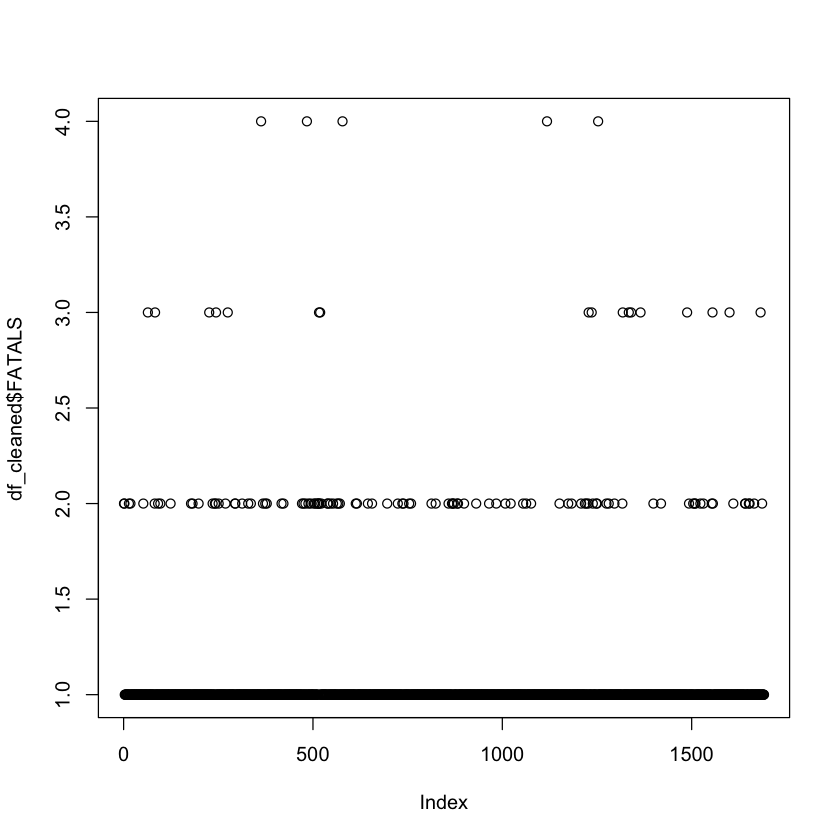

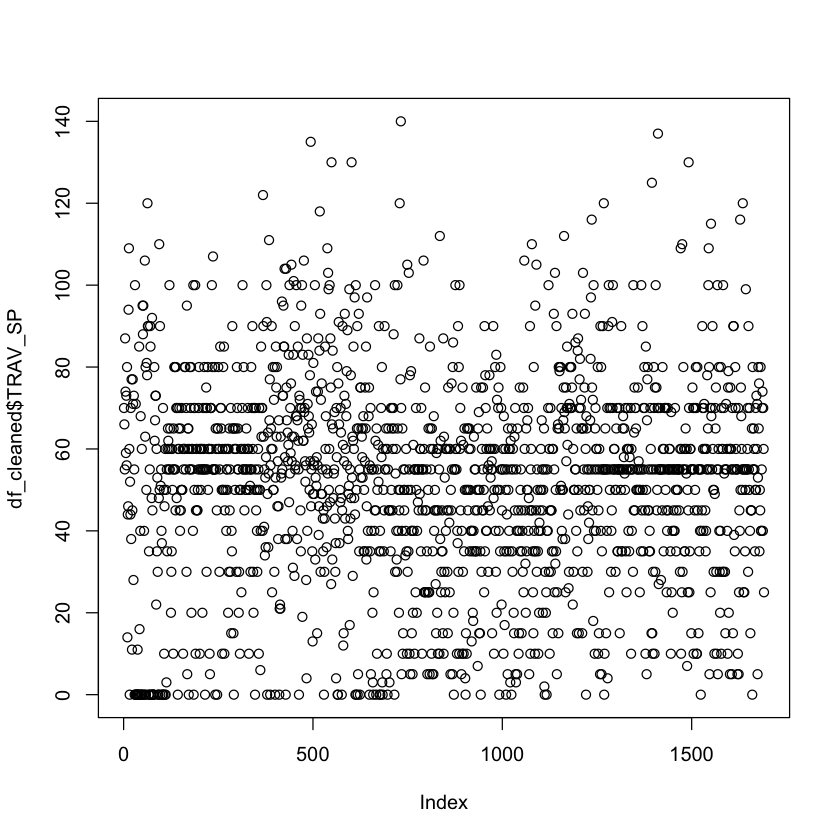

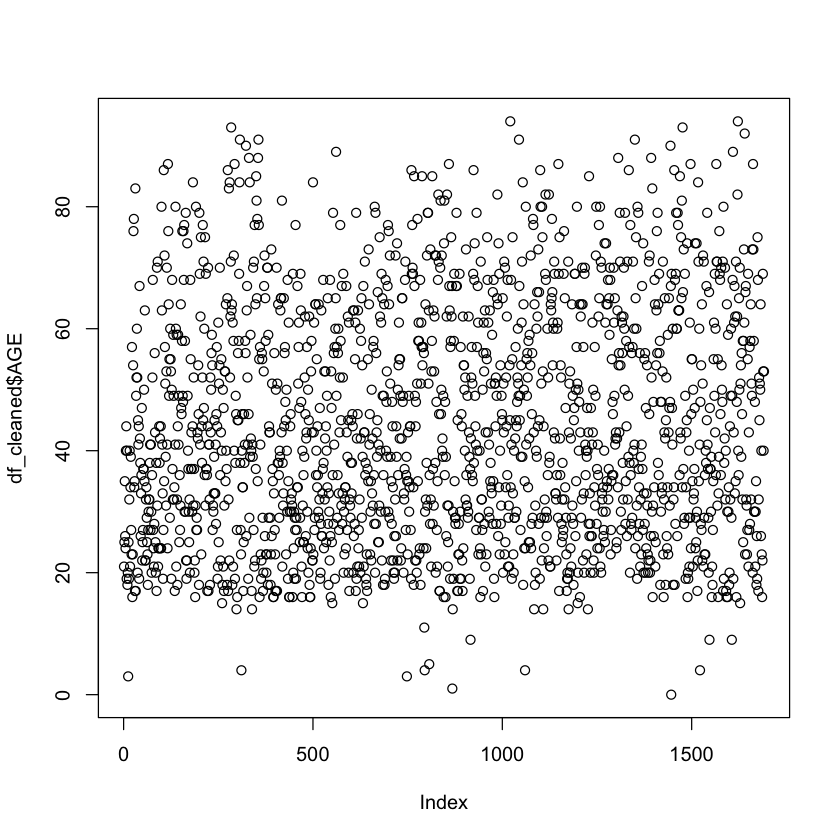

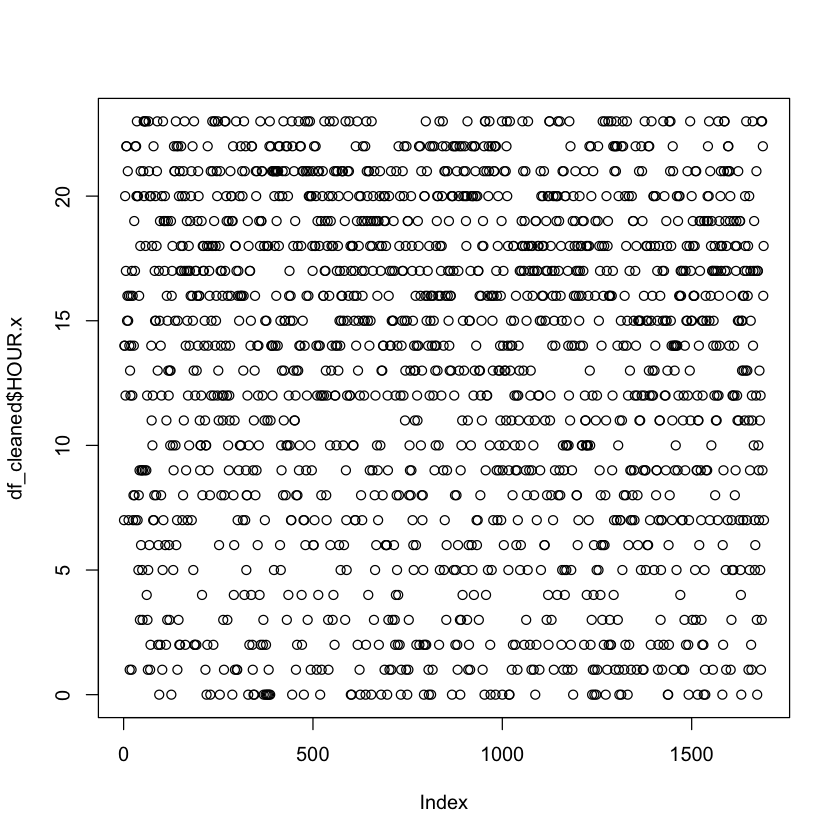

In [30]:
plot(df_cleaned$FATALS)
plot(df_cleaned$TRAV_SP)
plot(df_cleaned$AGE)
plot(df_cleaned$HOUR.x)

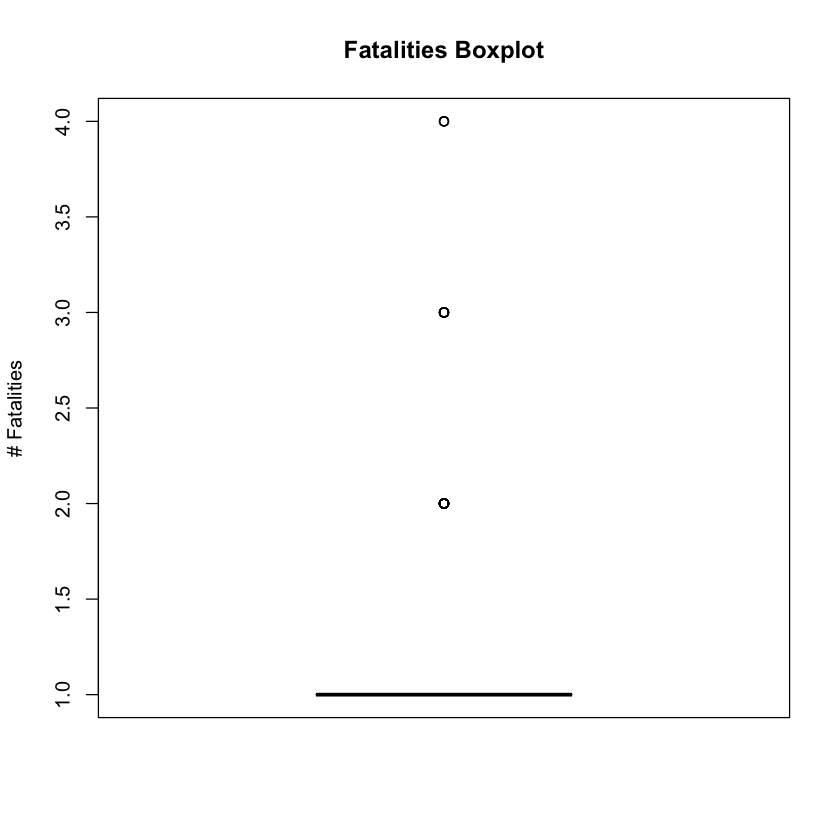

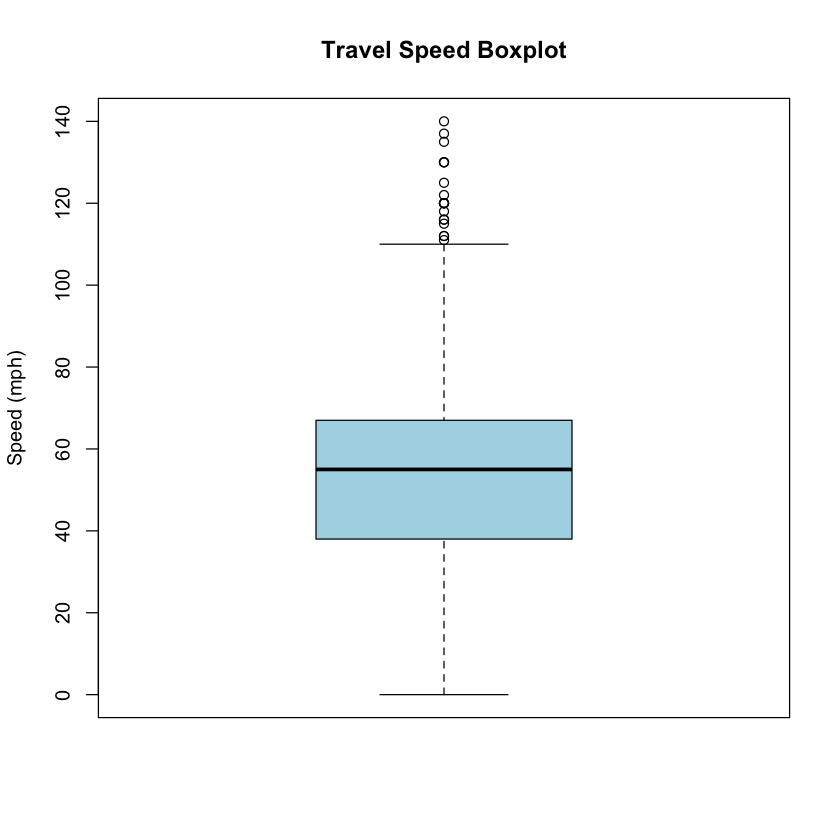

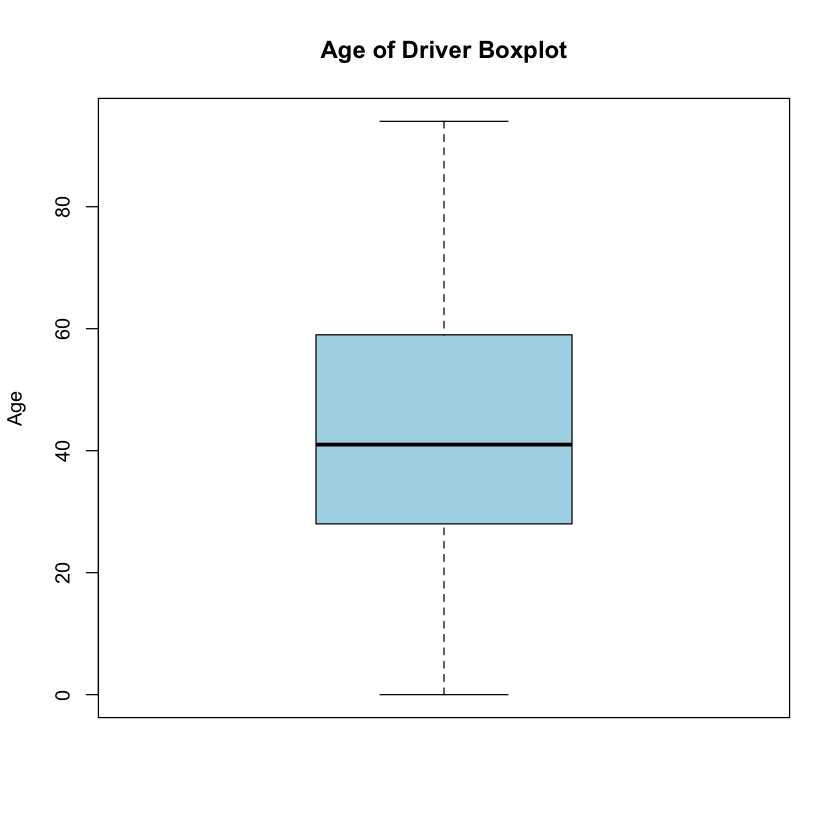

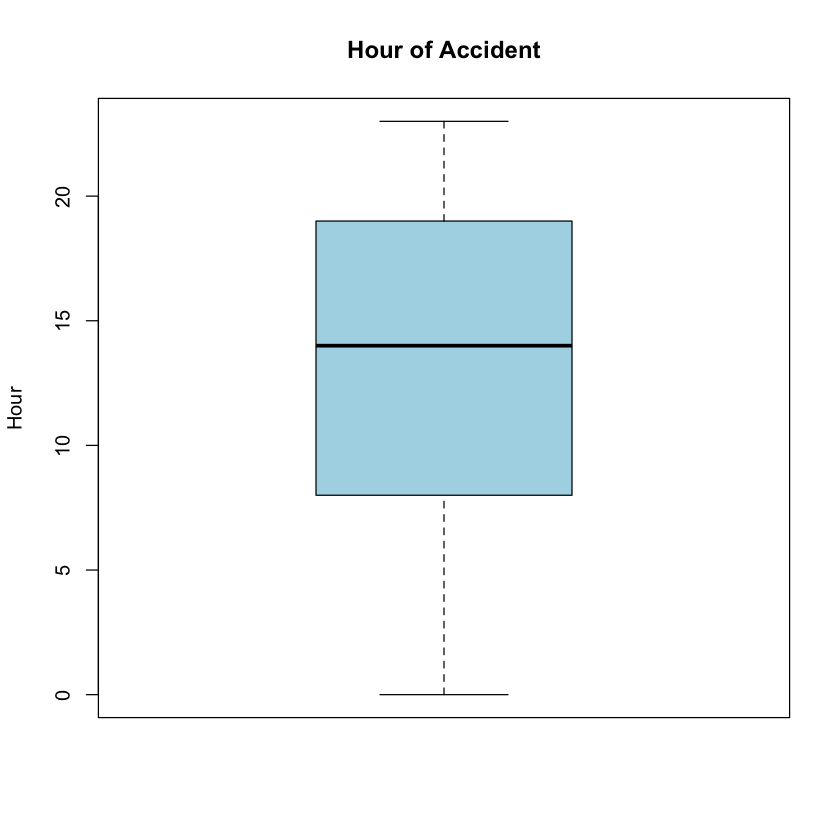

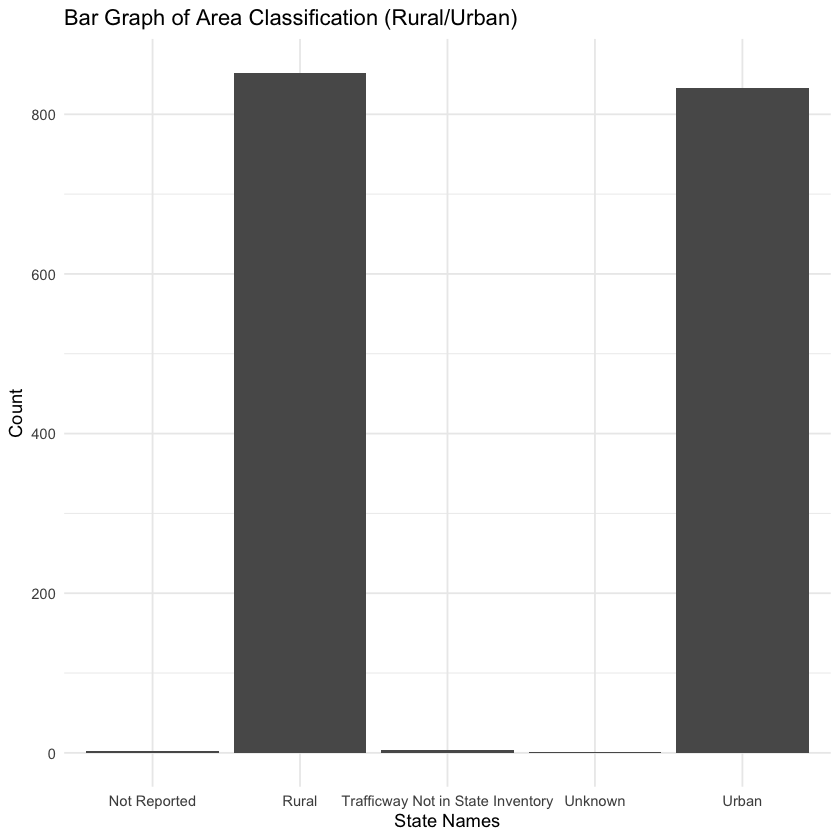

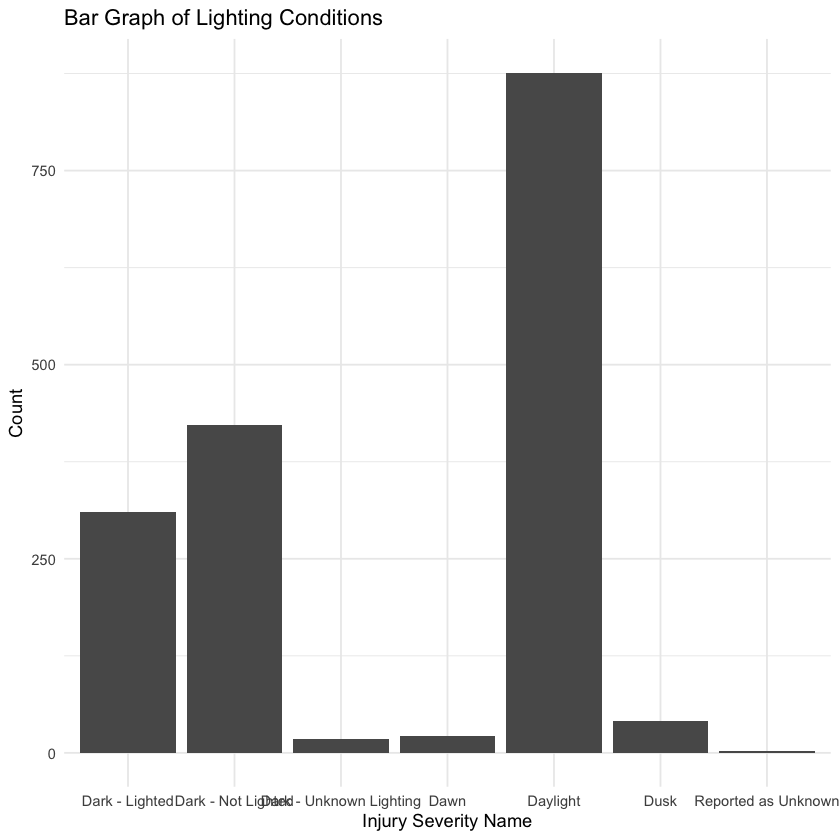

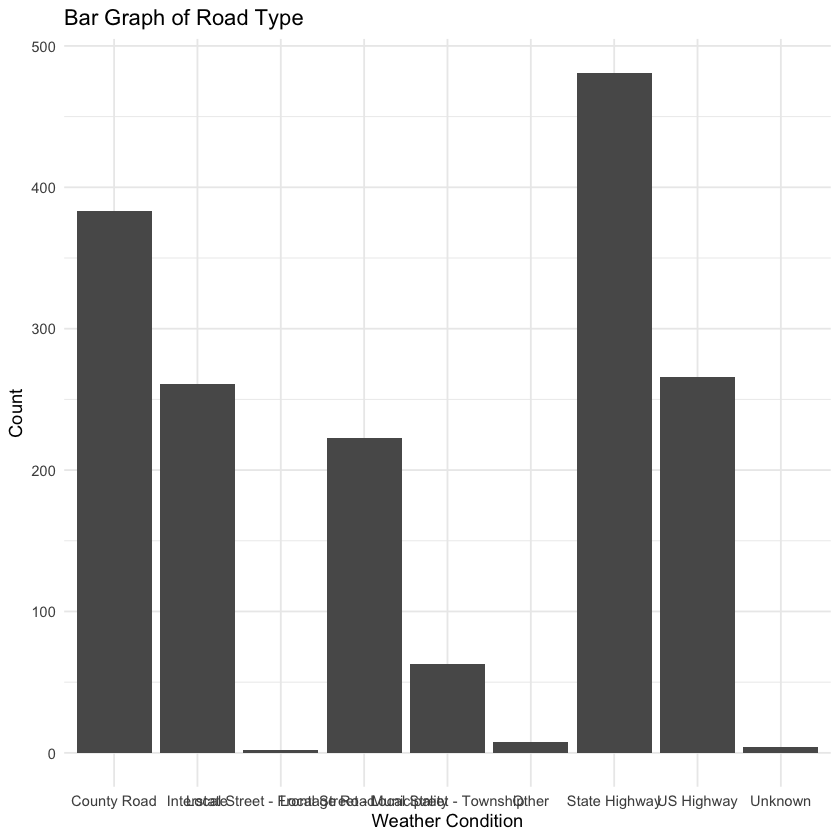

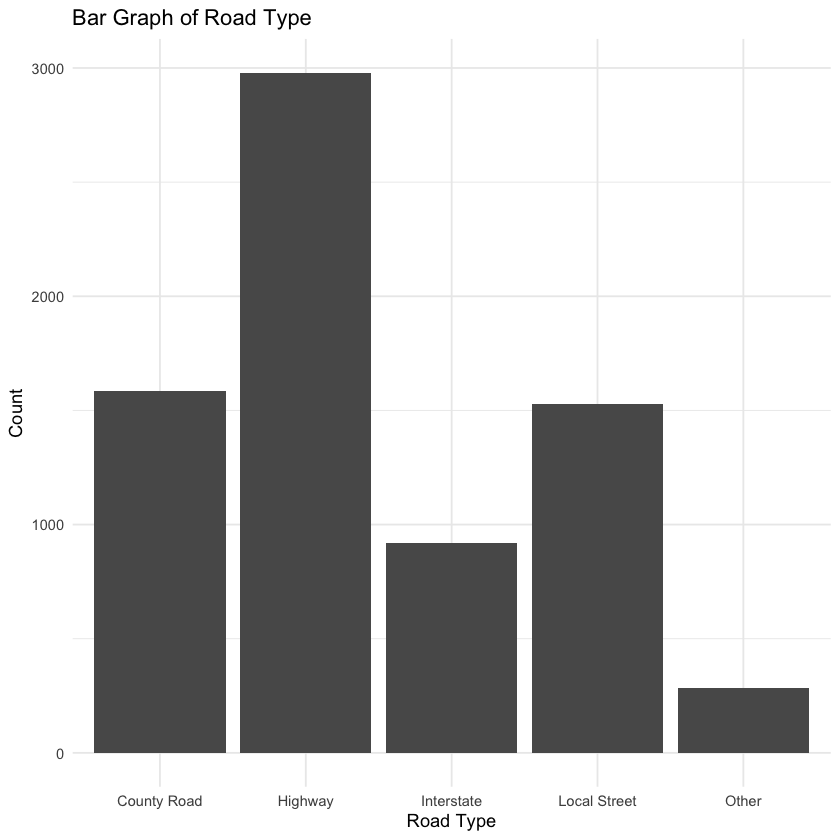

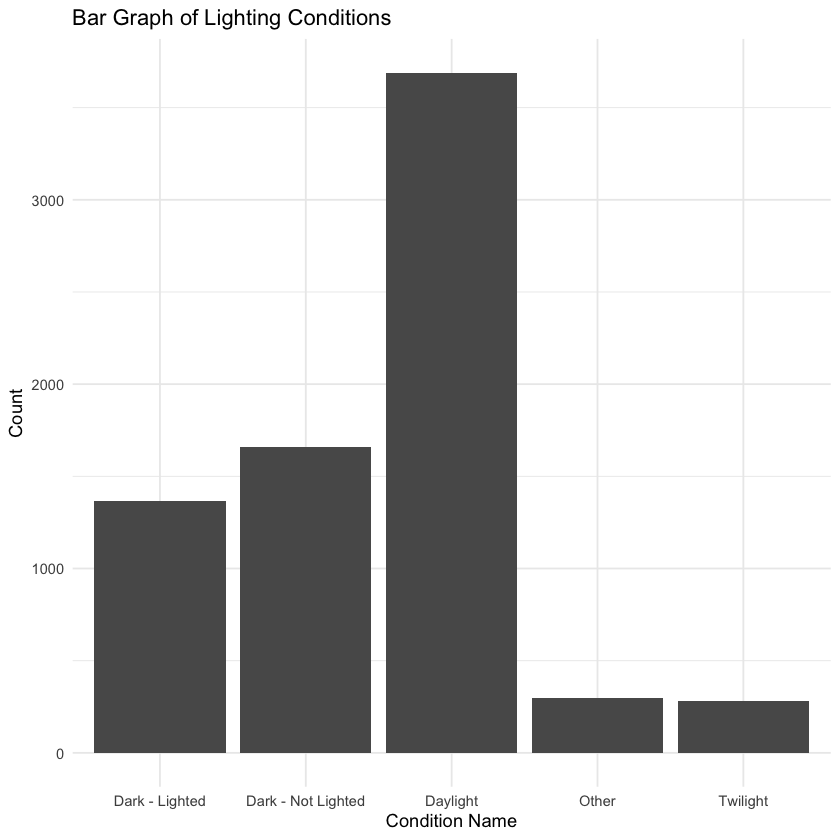

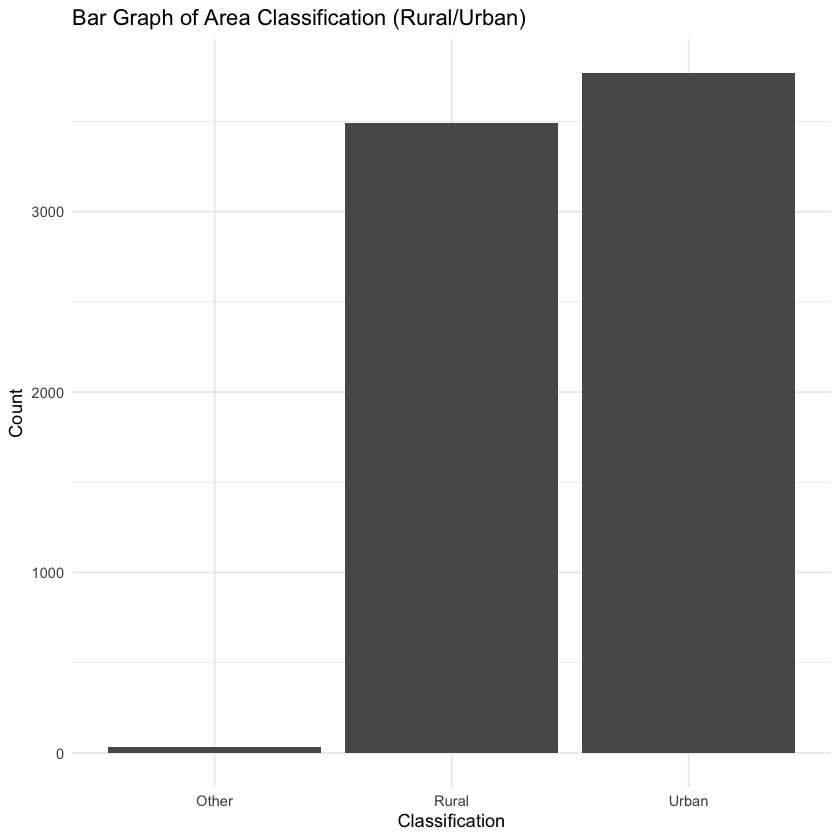

In [31]:
# Box-plots
boxplot(df_cleaned$FATALS, main="Fatalities Boxplot", ylab="# Fatalities", col = "lightblue")
boxplot(df_cleaned$TRAV_SP, main="Travel Speed Boxplot", ylab="Speed (mph)", col="lightblue")
boxplot(df_cleaned$AGE, main="Age of Driver Boxplot", ylab="Age", col="lightblue")
boxplot(df_cleaned$HOUR.x, main="Hour of Accident", ylab="Hour", col="lightblue")

# Initial Categorical Variable Plots - Bar Graphs
ggplot(df_cleaned, aes(x = RUR_URBNAME.x)) +
  geom_bar() +
  labs(title = "Bar Graph of Area Classification (Rural/Urban)", x = "State Names", y = "Count") +
  theme_minimal()

ggplot(df_cleaned, aes(x = LGT_CONDNAME)) +
  geom_bar() +
  labs(title = "Bar Graph of Lighting Conditions", x = "Injury Severity Name", y = "Count") +
  theme_minimal()

ggplot(df_cleaned, aes(x = ROUTENAME)) +
  geom_bar() +
  labs(title = "Bar Graph of Road Type", x = "Weather Condition", y = "Count") +
  theme_minimal()


## VARIABLE VALUE CORRECTION - Combine Values for Categorical Variables ##
# ROUTENAME
df <- df %>%
  mutate(RouteCategory = case_when(
    ROUTENAME %in% c("County Road") ~ "County Road",
    ROUTENAME %in% c("Interstate") ~ "Interstate",
    ROUTENAME %in% c("Local Street - Frontage Road", "Local Street - Municipality", "Local Street - Township") ~ "Local Street",
    ROUTENAME %in% c("State Highway", "US Highway") ~ "Highway",
    TRUE ~ "Other"  # Catch-all for "Other" and "Unknown"
  ))

ggplot(df, aes(x = RouteCategory)) +
  geom_bar() +
  labs(title = "Bar Graph of Road Type", x = "Road Type", y = "Count") +
  theme_minimal()

# LGT_CONDNAME
df <- df %>%
  mutate(LightCond = case_when(
    LGT_CONDNAME %in% c("Dark - Lighted") ~ "Dark - Lighted",
    LGT_CONDNAME %in% c("Dark - Not Lighted") ~ "Dark - Not Lighted",
    LGT_CONDNAME %in% c("Daylight") ~ "Daylight",
    LGT_CONDNAME %in% c("Dusk", "Dawn") ~ "Twilight",
    TRUE ~ "Other"  # Catch-all for "Other" and "Unknown"
  ))

ggplot(df, aes(x = LightCond)) +
  geom_bar() +
  labs(title = "Bar Graph of Lighting Conditions", x = "Condition Name", y = "Count") +
  theme_minimal()

# RUR_URBNAME.x
df <- df %>%
  mutate(AreaClass = case_when(
    RUR_URBNAME.x %in% c("Rural") ~ "Rural",
    RUR_URBNAME.x %in% c("Urban") ~ "Urban",
    TRUE ~ "Other"  # Catch-all for "Other" and "Unknown"
  ))

ggplot(df, aes(x = AreaClass)) +
  geom_bar() +
  labs(title = "Bar Graph of Area Classification (Rural/Urban)", x = "Classification", y = "Count") +
  theme_minimal()

#### Correlation Matrices

               FATALS     TRAV_SP         AGE        HOUR.x
FATALS   1.0000000000  0.11467912 -0.07243145  0.0008462903
TRAV_SP  0.1146791242  1.00000000 -0.22419940 -0.0996871433
AGE     -0.0724314455 -0.22419940  1.00000000  0.0885004556
HOUR.x   0.0008462903 -0.09968714  0.08850046  1.0000000000


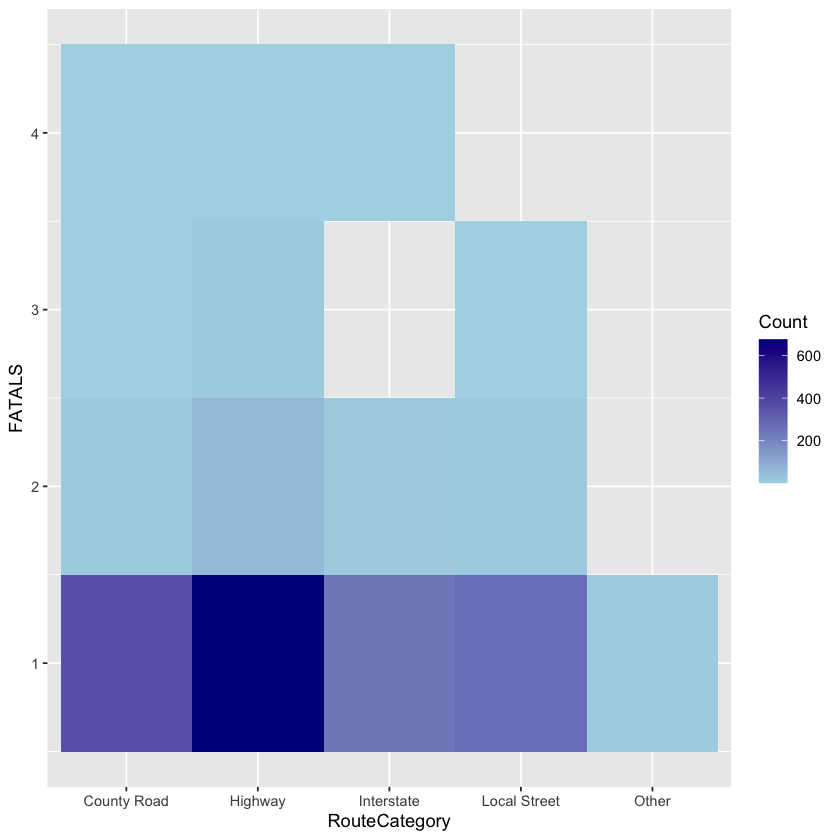

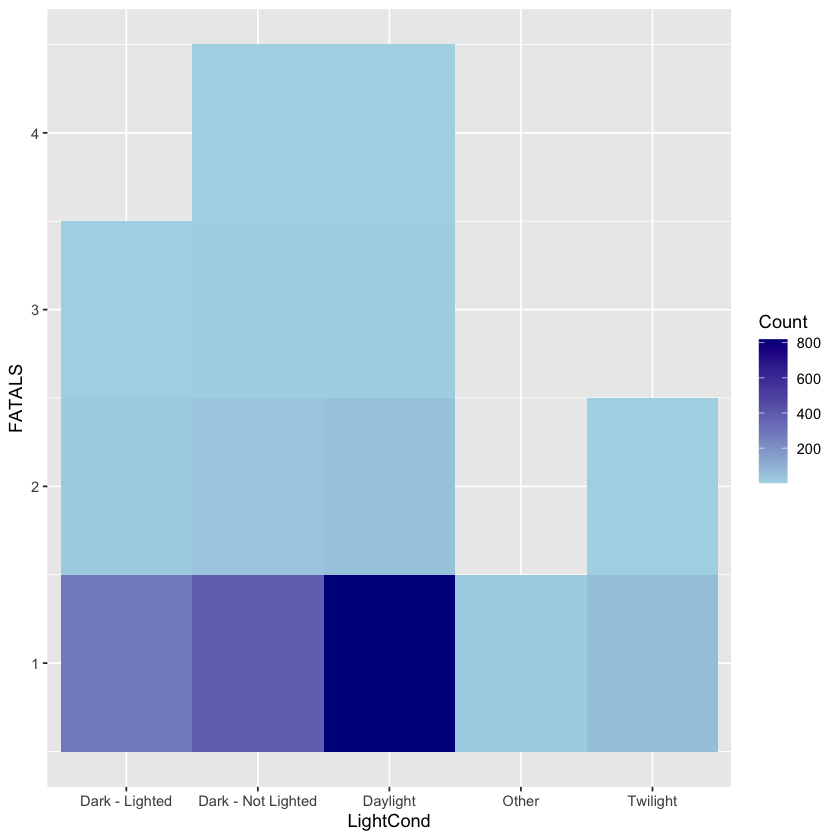

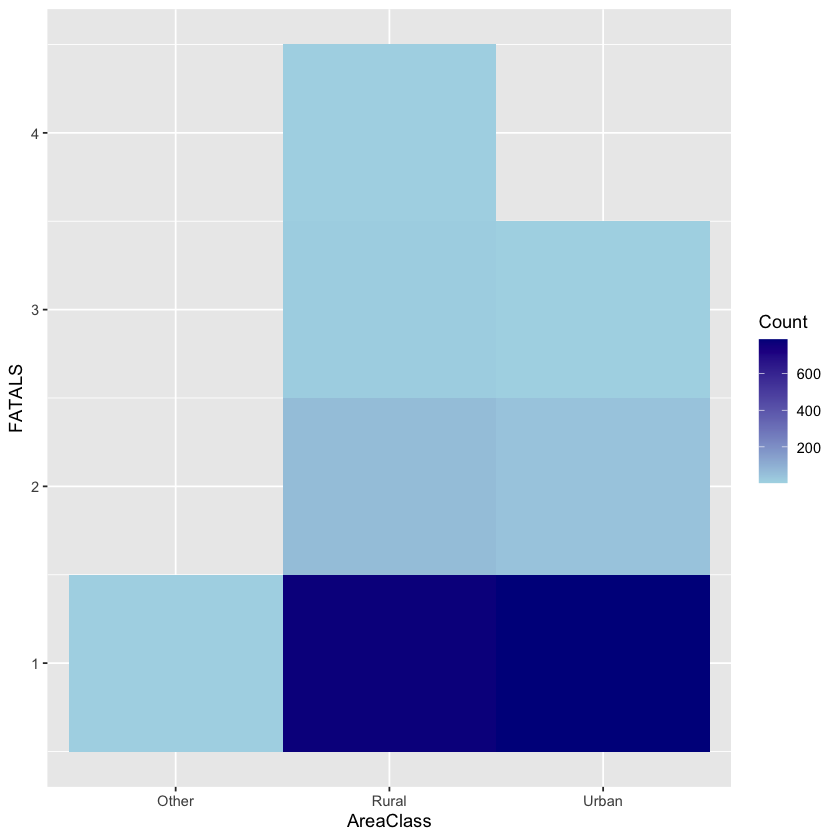

In [33]:
## SHOW CORRELATION ##
# Correlation Matrix for Continuous
subset_df <- df_cleaned[c("FATALS", "TRAV_SP", "AGE", "HOUR.x")]
cor_matrix_sub <- cor(subset_df)
print(cor_matrix_sub)


# Heat Maps for Categoricals
# Route x Fatalities
route_fatals_counts <- df_cleaned %>%
  count(RouteCategory, FATALS)

ggplot(route_fatals_counts, aes(x = RouteCategory, y = FATALS, fill = n)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(fill = "Count")

# Lighting Conditions x Fatalities
light_fatals_counts <- df_cleaned %>%
  count(LightCond, FATALS)

ggplot(light_fatals_counts, aes(x = LightCond, y = FATALS, fill = n)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(fill = "Count")

# Area Classification x Fatalities
area_fatals_counts <- df_cleaned %>%
  count(AreaClass, FATALS)

ggplot(area_fatals_counts, aes(x = AreaClass, y = FATALS, fill = n)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(fill = "Count")


Call:
lm(formula = FATALS ~ RouteCategory + LightCond + AreaClass + 
    TRAV_SP + AGE + HOUR.x, data = df_cleaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24526 -0.12312 -0.08442 -0.03846  2.90370 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.0084440  0.1636970   6.160 9.06e-10 ***
RouteCategoryHighway         0.0465599  0.0216760   2.148 0.031857 *  
RouteCategoryInterstate      0.0274333  0.0279565   0.981 0.326594    
RouteCategoryLocal Street    0.0202154  0.0280309   0.721 0.470899    
RouteCategoryOther          -0.0333900  0.1140461  -0.293 0.769729    
LightCondDark - Not Lighted -0.0029963  0.0281195  -0.107 0.915155    
LightCondDaylight           -0.0245553  0.0248191  -0.989 0.322625    
LightCondOther              -0.0984148  0.0800896  -1.229 0.219316    
LightCondTwilight           -0.0226994  0.0483443  -0.470 0.638747    
AreaClassRural               0.0663363  0.1598091   0.

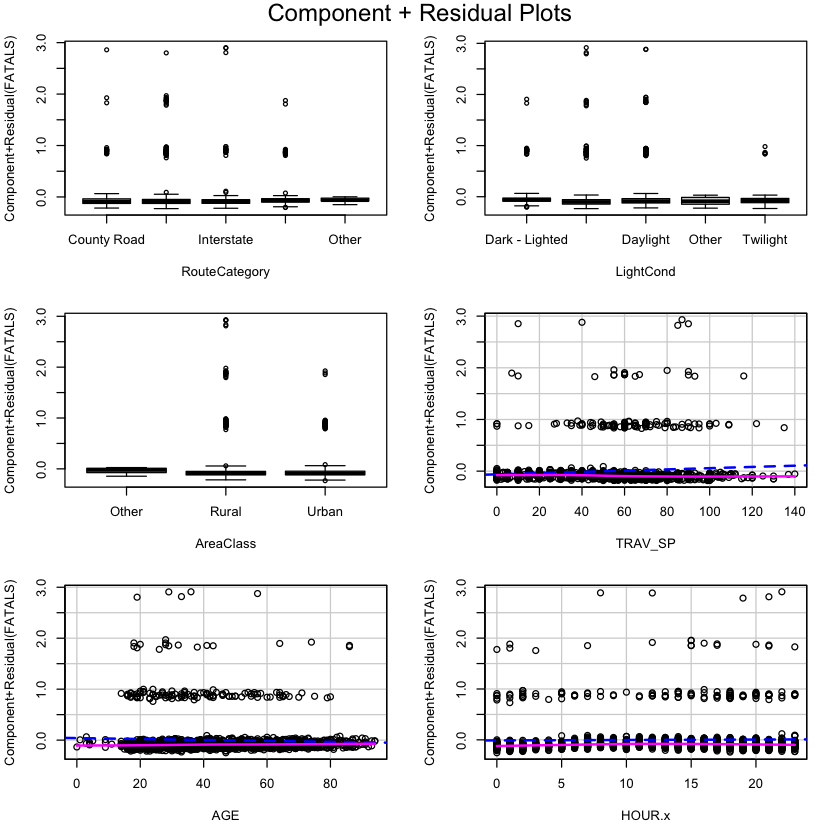

In [37]:
## PARTIAL REGRESSION PLOT ##
# Convert categorical variables to factors
df_cleaned$RouteCategory <- factor(df_cleaned$RouteCategory)
df_cleaned$LightCond <- factor(df_cleaned$LightCond)
df_cleaned$AreaClass <- factor(df_cleaned$AreaClass)

model <- lm(FATALS ~ RouteCategory + LightCond + AreaClass + TRAV_SP + AGE + HOUR.x, data = df_cleaned)

summary(model)
crPlots(model)